In [0]:
import keras as ks
import pandas as pd
import numpy as np
import matplotlib as mpl
import math
import re
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(); sns.set_palette('husl')
mpl.rcParams['font.family'] = 'Arial Unicode MS'
from pprint import pprint

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [261]:
def kesson_table(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val, percent], axis=1)
    kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
    return kesson_table_ren_columns

kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


**カラムの一覧**
*   PassengerId – 乗客識別ユニークID
*   Survived – 生存フラグ（0=死亡、1=生存)
*   Pclass – チケットクラス
*   Name – 乗客の名前
*   Sex – 性別（male=男性、female＝女性）
*   Age – 年齢
*   SibSp – タイタニックに同乗している兄弟/配偶者の数
*   parch – タイタニックに同乗している親/子供の数
*   ticket – チケット番号
*   fare – 料金
*   cabin – 客室番号
*   Embarked – 出港地（タイタニックへ乗った港）

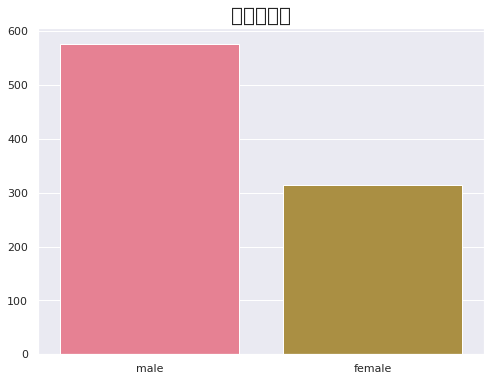

In [65]:
sex_counts = train['Sex'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('性別の分布', fontsize=20)
plt.show()

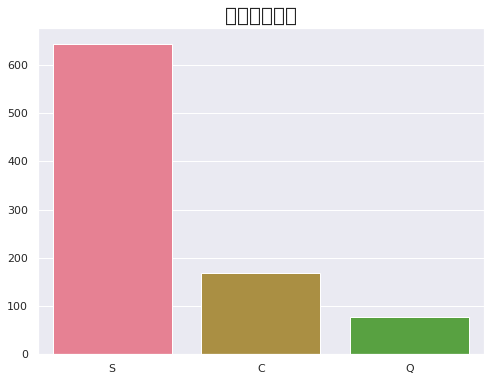

In [66]:
data_counts = train['Embarked'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=data_counts.index, y=data_counts.values)
plt.title('出港地の分布', fontsize=20)
plt.show()

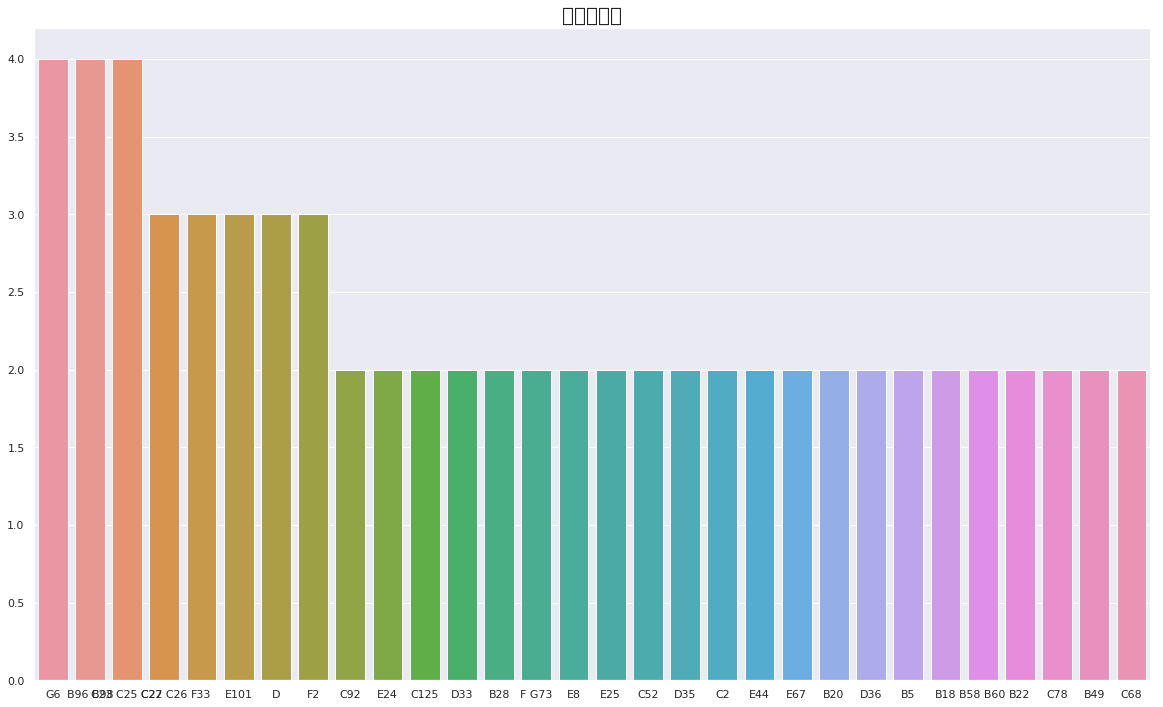

In [67]:
room_counts = train['Cabin'].value_counts()[:30]
plt.figure(figsize=(20, 12))
sns.barplot(x=room_counts.index, y=room_counts.values)
plt.title('客室の分布', fontsize=20)
plt.show()

In [0]:
cabin_non_nan = train['Cabin'].dropna().index

In [69]:
train.iloc[cabin_non_nan]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


苗字を使えないか

In [0]:
train["surname"] = train["Name"].apply(lambda x:x.split(",")[0])

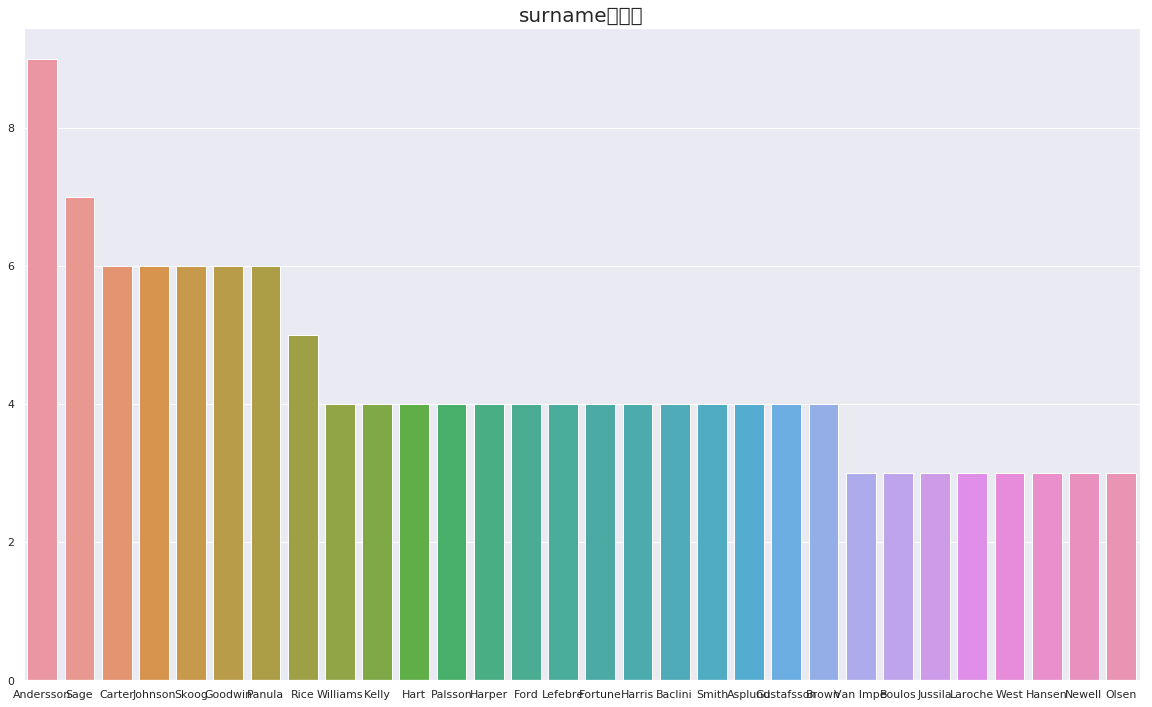

In [112]:
data_counts = train['surname'].value_counts()[:30]
plt.figure(figsize=(20, 12))
sns.barplot(x=data_counts.index, y=data_counts.values)
plt.title('surnameの分布', fontsize=20)
plt.show()

In [113]:
train[train["surname"] == data_counts.index[0]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson


In [114]:
train[train["surname"] == data_counts.index[-1]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S,Olsen
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S,Olsen
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,Olsen


In [263]:
train['Andersson'] = None
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Andersson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,None


In [0]:
mask1 = train['surname'] == 'Andersson'
mask2 = train['surname'] != 'Andersson'

In [265]:
train.loc[mask1, 'Andersson'] = 1
train.loc[mask2, 'Andersson'] = 0
train.head(14)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Andersson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,0


In [0]:
train['Sage'] = None
mask3 = train['surname'] == 'Sage'
mask4 = train['surname'] != 'Sage'
train.loc[mask3, 'Sage'] = 1
train.loc[mask4, 'Sage'] = 0

In [0]:
train['Panula'] = None
mask5 = train['surname'] == 'Panula'
mask6 = train['surname'] != 'Panula'
train.loc[mask5, 'Panula'] = 1
train.loc[mask6, 'Panula'] = 0

In [0]:
train['Skoog'] = None
mask7 = train['surname'] == 'Skoog'
mask8 = train['surname'] != 'Skoog'
train.loc[mask7, 'Skoog'] = 1
train.loc[mask8, 'Skoog'] = 0

In [0]:
train['Johnson'] = None
mask9 = train['surname'] == 'Johnson'
mask10 = train['surname'] != 'Johnson'
train.loc[mask9, 'Johnson'] = 1
train.loc[mask10, 'Johnson'] = 0

In [0]:
train['Carter'] = None
mask11 = train['surname'] == 'Carter'
mask12 = train['surname'] != 'Carter'
train.loc[mask11, 'Carter'] = 1
train.loc[mask12, 'Carter'] = 0

In [0]:
train['Goodwin'] = None
mask13 = train['surname'] == 'Goodwin'
mask14 = train['surname'] != 'Goodwin'
train.loc[mask13, 'Goodwin'] = 1
train.loc[mask14, 'Goodwin'] = 0

In [0]:
train['Rice'] = None
mask15 = train['surname'] == 'Rice'
mask16 = train['surname'] != 'Rice'
train.loc[mask15, 'Rice'] = 1
train.loc[mask16, 'Rice'] = 0

In [0]:
train['Smith'] = None
mask17 = train['surname'] == 'Smith'
mask18 = train['surname'] != 'Smith'
train.loc[mask17, 'Smith'] = 1
train.loc[mask18, 'Smith'] = 0

In [0]:
train['Asplund'] = None
mask19 = train['surname'] == 'Asplund'
mask20 = train['surname'] != 'Asplund'
train.loc[mask19, 'Asplund'] = 1
train.loc[mask20, 'Asplund'] = 0

In [0]:
train['Ford'] = None
mask21 = train['surname'] == 'Ford'
mask22 = train['surname'] != 'Ford'
train.loc[mask21, 'Ford'] = 1
train.loc[mask22, 'Ford'] = 0

In [0]:
train['Lefebre'] = None
mask23 = train['surname'] == 'Lefebre'
mask24 = train['surname'] != 'Lefebre'
train.loc[mask23, 'Lefebre'] = 1
train.loc[mask24, 'Lefebre'] = 0

In [0]:
train['Baclini'] = None
mask25 = train['surname'] == 'Baclini'
mask26 = train['surname'] != 'Baclini'
train.loc[mask25, 'Baclini'] = 1
train.loc[mask26, 'Baclini'] = 0

In [0]:
train['Hart'] = None
mask27 = train['surname'] == 'Hart'
mask28 = train['surname'] != 'Hart'
train.loc[mask27, 'Hart'] = 1
train.loc[mask28, 'Hart'] = 0

In [0]:
train['Palsson'] = None
mask29 = train['surname'] == 'Palsson'
mask30 = train['surname'] != 'Palsson'
train.loc[mask29, 'Palsson'] = 1
train.loc[mask30, 'Palsson'] = 0

In [0]:
train['Fortune'] = None
mask31 = train['surname'] == 'Fortune'
mask32 = train['surname'] != 'Fortune'
train.loc[mask31, 'Fortune'] = 1
train.loc[mask32, 'Fortune'] = 0

In [0]:
train['Brown'] = None
mask33 = train['surname'] == 'Brown'
mask34 = train['surname'] != 'Brown'
train.loc[mask33, 'Brown'] = 1
train.loc[mask34, 'Brown'] = 0

In [0]:
train['Kelly'] = None
mask35 = train['surname'] == 'Kelly'
mask36 = train['surname'] != 'Kelly'
train.loc[mask35, 'Kelly'] = 1
train.loc[mask36, 'Kelly'] = 0

In [0]:
train['Harper'] = None
mask37 = train['surname'] == 'Harper'
mask38 = train['surname'] != 'Harper'
train.loc[mask37, 'Harper'] = 1
train.loc[mask38, 'Harper'] = 0

In [0]:
train['Williams'] = None
mask39 = train['surname'] == 'Williams'
mask40 = train['surname'] != 'Williams'
train.loc[mask39, 'Williams'] = 1
train.loc[mask40, 'Williams'] = 0

In [0]:
train['Gustafsson'] = None
mask41 = train['surname'] == 'Gustafsson'
mask42 = train['surname'] != 'Gustafsson'
train.loc[mask41, 'Gustafsson'] = 1
train.loc[mask42, 'Gustafsson'] = 0

In [0]:
train['Harris'] = None
mask43 = train['surname'] == 'Harris'
mask44 = train['surname'] != 'Harris'
train.loc[mask43, 'Harris'] = 1
train.loc[mask44, 'Harris'] = 0

In [287]:
train.shape

(891, 35)

In [288]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Andersson,Sage,Panula,Skoog,Johnson,Carter,Goodwin,Rice,Smith,Asplund,Ford,Lefebre,Baclini,Hart,Palsson,Fortune,Brown,Kelly,Harper,Williams,Gustafsson,Harris
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [289]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Embarked"] = train["Embarked"].fillna("S")

kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [290]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q" ] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-p

In [0]:
test["surname"] = test["Name"].apply(lambda x:x.split(",")[0])

In [292]:
test['Andersson'] = None
mask51 = test['surname'] == 'Andersson'
mask52 = test['surname'] != 'Andersson'
test.loc[mask51, 'Andersson'] = 1
test.loc[mask52, 'Andersson'] = 0
test['Sage'] = None
mask53 = test['surname'] == 'Sage'
mask54 = test['surname'] != 'Sage'
test.loc[mask53, 'Sage'] = 1
test.loc[mask54, 'Sage'] = 0
test['Panula'] = None
mask55 = test['surname'] == 'Panula'
mask56 = test['surname'] != 'Panula'
test.loc[mask55, 'Panula'] = 1
test.loc[mask56, 'Panula'] = 0
test['Skoog'] = None
mask57 = test['surname'] == 'Skoog'
mask58 = test['surname'] != 'Skoog'
test.loc[mask57, 'Skoog'] = 1
test.loc[mask58, 'Skoog'] = 0
test['Johnson'] = None
mask59 = test['surname'] == 'Johnson'
mask60 = test['surname'] != 'Johnson'
test.loc[mask59, 'Johnson'] = 1
test.loc[mask60, 'Johnson'] = 0
test['Carter'] = None
mask61 = test['surname'] == 'Carter'
mask62 = test['surname'] != 'Carter'
test.loc[mask61, 'Carter'] = 1
test.loc[mask62, 'Carter'] = 0
test['Goodwin'] = None
mask63 = test['surname'] == 'Goodwin'
mask64 = test['surname'] != 'Goodwin'
test.loc[mask63, 'Goodwin'] = 1
test.loc[mask64, 'Goodwin'] = 0
test['Rice'] = None
mask65 = test['surname'] == 'Rice'
mask66 = test['surname'] != 'Rice'
test.loc[mask65, 'Rice'] = 1
test.loc[mask66, 'Rice'] = 0
test['Smith'] = None
mask67 = test['surname'] == 'Smith'
mask68 = test['surname'] != 'Smith'
test.loc[mask67, 'Smith'] = 1
test.loc[mask68, 'Smith'] = 0
test['Asplund'] = None
mask69 = test['surname'] == 'Asplund'
mask70 = test['surname'] != 'Asplund'
test.loc[mask69, 'Asplund'] = 1
test.loc[mask70, 'Asplund'] = 0
test['Ford'] = None
mask71 = test['surname'] == 'Ford'
mask72 = test['surname'] != 'Ford'
test.loc[mask71, 'Ford'] = 1
test.loc[mask72, 'Ford'] = 0
test['Lefebre'] = None
mask73 = test['surname'] == 'Lefebre'
mask74 = test['surname'] != 'Lefebre'
test.loc[mask73, 'Lefebre'] = 1
test.loc[mask74, 'Lefebre'] = 0
test['Baclini'] = None
mask75 = test['surname'] == 'Baclini'
mask76 = test['surname'] != 'Baclini'
test.loc[mask75, 'Baclini'] = 1
test.loc[mask76, 'Baclini'] = 0
test['Hart'] = None
mask77 = test['surname'] == 'Hart'
mask78 = test['surname'] != 'Hart'
test.loc[mask77, 'Hart'] = 1
test.loc[mask78, 'Hart'] = 0
test['Palsson'] = None
mask79 = test['surname'] == 'Palsson'
mask80 = test['surname'] != 'Palsson'
test.loc[mask79, 'Palsson'] = 1
test.loc[mask80, 'Palsson'] = 0
test['Fortune'] = None
mask81 = test['surname'] == 'Fortune'
mask82 = test['surname'] != 'Fortune'
test.loc[mask81, 'Fortune'] = 1
test.loc[mask82, 'Fortune'] = 0
test['Brown'] = None
mask83 = test['surname'] == 'Brown'
mask84 = test['surname'] != 'Brown'
test.loc[mask83, 'Brown'] = 1
test.loc[mask84, 'Brown'] = 0
test['Kelly'] = None
mask85 = test['surname'] == 'Kelly'
mask86 = test['surname'] != 'Kelly'
test.loc[mask85, 'Kelly'] = 1
test.loc[mask86, 'Kelly'] = 0
test['Harper'] = None
mask87 = test['surname'] == 'Harper'
mask88 = test['surname'] != 'Harper'
test.loc[mask87, 'Harper'] = 1
test.loc[mask88, 'Harper'] = 0
test['Williams'] = None
mask89 = test['surname'] == 'Williams'
mask90 = test['surname'] != 'Williams'
test.loc[mask89, 'Williams'] = 1
test.loc[mask90, 'Williams'] = 0
test['Gustafsson'] = None
mask91 = test['surname'] == 'Gustafsson'
mask92 = test['surname'] != 'Gustafsson'
test.loc[mask91, 'Gustafsson'] = 1
test.loc[mask92, 'Gustafsson'] = 0
test['Harris'] = None
mask93 = test['surname'] == 'Harris'
mask94 = test['surname'] != 'Harris'
test.loc[mask93, 'Harris'] = 1
test.loc[mask94, 'Harris'] = 0

test.shape

(418, 34)

In [293]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Andersson,Sage,Panula,Skoog,Johnson,Carter,Goodwin,Rice,Smith,Asplund,Ford,Lefebre,Baclini,Hart,Palsson,Fortune,Brown,Kelly,Harper,Williams,Gustafsson,Harris
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Svensson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Connolly,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Caldwell,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Abrahim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Davies,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [294]:
test["Age"] = test["Age"].fillna(test["Age"].mean())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S" ] = 0
test["Embarked"][test["Embarked"] == "C" ] = 1
test["Embarked"][test["Embarked"] == "Q" ] = 2
test.Fare[152] = test.Fare.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ip

In [295]:
train["Pclass"] /= 3
train["Age"] /= 80
train["SibSp"] /= 8
train["Parch"] /= 6
train["Fare"] /= 512.3292
train["Embarked"] /= 2

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Andersson,Sage,Panula,Skoog,Johnson,Carter,Goodwin,Rice,Smith,Asplund,Ford,Lefebre,Baclini,Hart,Palsson,Fortune,Brown,Kelly,Harper,Williams,Gustafsson,Harris
0,1,0,1.000000,"Braund, Mr. Owen Harris",0,0.2750,0.125,0.0,A/5 21171,0.014151,NaN,0,Braund,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0.333333,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.4750,0.125,0.0,PC 17599,0.139136,C85,0.5,Cumings,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1.000000,"Heikkinen, Miss. Laina",1,0.3250,0.000,0.0,STON/O2. 3101282,0.015469,NaN,0,Heikkinen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0.333333,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.4375,0.125,0.0,113803,0.103644,C123,0,Futrelle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1.000000,"Allen, Mr. William Henry",0,0.4375,0.000,0.0,373450,0.015713,NaN,0,Allen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [296]:
test["Pclass"] /= 3
test["Age"] /= 76
test["SibSp"] /= 8
test["Parch"] /= 9
test["Fare"] /= 512.3292
test["Embarked"] /= 2

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Andersson,Sage,Panula,Skoog,Johnson,Carter,Goodwin,Rice,Smith,Asplund,Ford,Lefebre,Baclini,Hart,Palsson,Fortune,Brown,Kelly,Harper,Williams,Gustafsson,Harris
0,892,1.000000,"Kelly, Mr. James",0,0.453947,0.000,0.000000,330911,0.015282,NaN,1,Kelly,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,893,1.000000,"Wilkes, Mrs. James (Ellen Needs)",1,0.618421,0.125,0.000000,363272,0.013663,NaN,0,Wilkes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,894,0.666667,"Myles, Mr. Thomas Francis",0,0.815789,0.000,0.000000,240276,0.018909,NaN,1,Myles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,895,1.000000,"Wirz, Mr. Albert",0,0.355263,0.000,0.000000,315154,0.016908,NaN,0,Wirz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,896,1.000000,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.289474,0.125,0.111111,3101298,0.023984,NaN,0,Hirvonen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 32
num_classes = 2
epochs = 20

In [0]:
from sklearn.model_selection import train_test_split

In [299]:
train.drop(['Name', 'Ticket', 'Cabin', 'surname'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Andersson,Sage,Panula,Skoog,Johnson,Carter,Goodwin,Rice,Smith,Asplund,Ford,Lefebre,Baclini,Hart,Palsson,Fortune,Brown,Kelly,Harper,Williams,Gustafsson,Harris
0,1,0,1.000000,0,0.2750,0.125,0.0,0.014151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0.333333,1,0.4750,0.125,0.0,0.139136,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1.000000,1,0.3250,0.000,0.0,0.015469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0.333333,1,0.4375,0.125,0.0,0.103644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1.000000,0,0.4375,0.000,0.0,0.015713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [300]:
test.drop(['Name', 'Ticket', 'Cabin', 'surname'], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Andersson,Sage,Panula,Skoog,Johnson,Carter,Goodwin,Rice,Smith,Asplund,Ford,Lefebre,Baclini,Hart,Palsson,Fortune,Brown,Kelly,Harper,Williams,Gustafsson,Harris
0,892,1.000000,0,0.453947,0.000,0.000000,0.015282,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,893,1.000000,1,0.618421,0.125,0.000000,0.013663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,894,0.666667,0,0.815789,0.000,0.000000,0.018909,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,895,1.000000,0,0.355263,0.000,0.000000,0.016908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,896,1.000000,1,0.289474,0.125,0.111111,0.023984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [301]:
train_train = train.drop(["Survived"], axis=1)
train_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Andersson,Sage,Panula,Skoog,Johnson,Carter,Goodwin,Rice,Smith,Asplund,Ford,Lefebre,Baclini,Hart,Palsson,Fortune,Brown,Kelly,Harper,Williams,Gustafsson,Harris
0,1,1.000000,0,0.2750,0.125,0.0,0.014151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.333333,1,0.4750,0.125,0.0,0.139136,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1.000000,1,0.3250,0.000,0.0,0.015469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.333333,1,0.4375,0.125,0.0,0.103644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1.000000,0,0.4375,0.000,0.0,0.015713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
target = train["Survived"].values
features = train_train.values

In [0]:
x_train, x_test, t_train, t_test = train_test_split(features, target, test_size =0.3, random_state = 0)

In [304]:
x_train.shape

(623, 30)

In [305]:
x_test.shape

(268, 30)

In [0]:
x_train = x_train.reshape(623, 30)
x_test = x_test.reshape(268, 30)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
t_train = ks.utils.to_categorical(t_train, num_classes)
t_test = ks.utils.to_categorical(t_test, num_classes)

In [308]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(30, )))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 18        
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In [309]:
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test))

Train on 623 samples, validate on 268 samples
Epoch 1/20
623/623 [==============================] - 1s 1ms/step - loss: 8.6045 - acc: 0.4286 - val_loss: 9.7255 - val_acc: 0.3731
Epoch 2/20
623/623 [==============================] - 0s 71us/step - loss: 8.8603 - acc: 0.4045 - val_loss: 9.6741 - val_acc: 0.3731
Epoch 3/20
623/623 [==============================] - 0s 67us/step - loss: 8.5994 - acc: 0.4093 - val_loss: 9.5977 - val_acc: 0.3731
Epoch 4/20
623/623 [==============================] - 0s 82us/step - loss: 8.3615 - acc: 0.4173 - val_loss: 9.5335 - val_acc: 0.3731
Epoch 5/20
623/623 [==============================] - 0s 71us/step - loss: 8.3434 - acc: 0.4173 - val_loss: 9.4369 - val_acc: 0.3731
Epoch 6/20
623/623 [==============================] - 0s 66us/step - loss: 8.2090 - acc: 0.4173 - val_loss: 9.3486 - val_acc: 0.3731
Epoch 7/20
623/623 [==============================] - 0s 67us/step - loss: 7.6454 - acc: 0.4334 - val_loss: 9.2510 - val_acc: 0.3731
Epoch 8/20
623/623 [====

accuracy低い、

In [0]:
test_features = test.values

In [311]:
predict_classes = model.predict_classes(test_features, batch_size=batch_size)

predict_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

みんな死んでしまった、4人以上いる名前使うのは微妙だったか。

In [312]:
predict_classes.shape

(418,)

In [0]:
PassengerId = np.array(test["PassengerId"]).astype(int)
                            
my_solution = pd.DataFrame(predict_classes, PassengerId, columns = ["Survived"])
                            
my_solution.to_csv("Solution5.csv", index_label = ["PassengerId"])

In [0]:
from google.colab import files
files.download("Solution5.csv")

62.68%
低い